# Introducción

En este documento se va a realizar un análisis exploratorio del cuerpo de datos extraido desde "OpenStreetMap".

# Carga de datos

In [6]:
!pip install xmltodict

In [38]:
import json
with open('ciudad_deseada.json', 'r') as myfile:
    data = json.load(myfile)

# Análisis

In [175]:
data['elements'][0]

{'id': 31035108,
 'lat': -12.0460404,
 'lon': -77.0430448,
 'tags': {'highway': 'traffic_signals', 'traffic_signals': 'signal'},
 'type': 'node'}

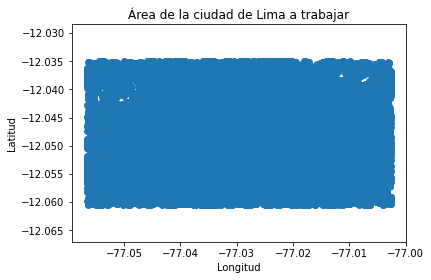

In [176]:
# Adapted from https://towardsdatascience.com/loading-data-from-openstreetmap-with-python-and-the-overpass-api-513882a27fd0
import numpy as np
import matplotlib.pyplot as plt
coords = []
ids=[]
for element in data['elements']:
  if element['type'] == 'node':
    ids.append(element['id'])
    lon = element['lon']
    lat = element['lat']
    coords.append((lon, lat))
  elif 'center' in element:
    ids.append(element['center']['id'])
    lon = element['center']['lon']
    lat = element['center']['lat']
    coords.append((lon, lat))

X = np.array(coords)
plt.plot(X[:, 0], X[:, 1], 'o')
plt.title('Área de la ciudad de Lima a trabajar')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.axis('equal')
plt.show()

In [177]:
print("Catidad de nodos obtenidos: ",X.shape[0])

Catidad de nodos obtenidos:  77811


Debido a la gran cantidad de nodos que se tienen, no tiene mucho sentido intentar graficar cada uno de ellos en un diagrama de dispersión. Asi que nos enfocaremos en otras partes del cuerpo de datos.

In [178]:
types={}
waytags=[]
ways=[]
for element in data['elements']:
  if "tags" in element.keys() and element['type']=='way':
    ways.append(element)
    waytags.append(element['tags'])
  if element['type'] not in types.keys():
    types[element['type']]=1
  else:
    types[element['type']]+=1
print(types)

{'node': 77811, 'way': 17314, 'relation': 616}


Se puede observar que se tiene 77811 nodos como se mencionó lineas arriba. De la misma manera, se puede observar que se tienen 17314 "ways". Esto quiere decir que de acuerdo a la wiki de "OpenStreetMap" (Colaboradores de OpenStreetMap, 2021), un "way" es un conjunto de nodos que representan una característica lineal del mapa. En otras palabras, se tienen 17314 caminos, paredes o ríos.

In [179]:
# Ahora observaremos más a detalle cada uno de estos "ways"
avs={}
for element in waytags:
  if 'name' in element.keys():
    if element['name'] not in avs.keys():
      avs[element['name']]= 1
    else:
      avs[element['name']]+=1

In [180]:
sortedavs=dict(sorted(avs.items(), key=lambda x:x[1],reverse=True))

In [181]:
list(sortedavs.keys())[0:7]

['Metropolitano',
 'Avenida Panamericana Norte',
 'Avenida Alfonso Ugarte',
 'Vía Expresa Línea Amarilla',
 'Avenida Almirante Miguel Grau',
 'Avenida Nicolás de Pierola',
 'Vía Expresa Almirante Miguel Grau']

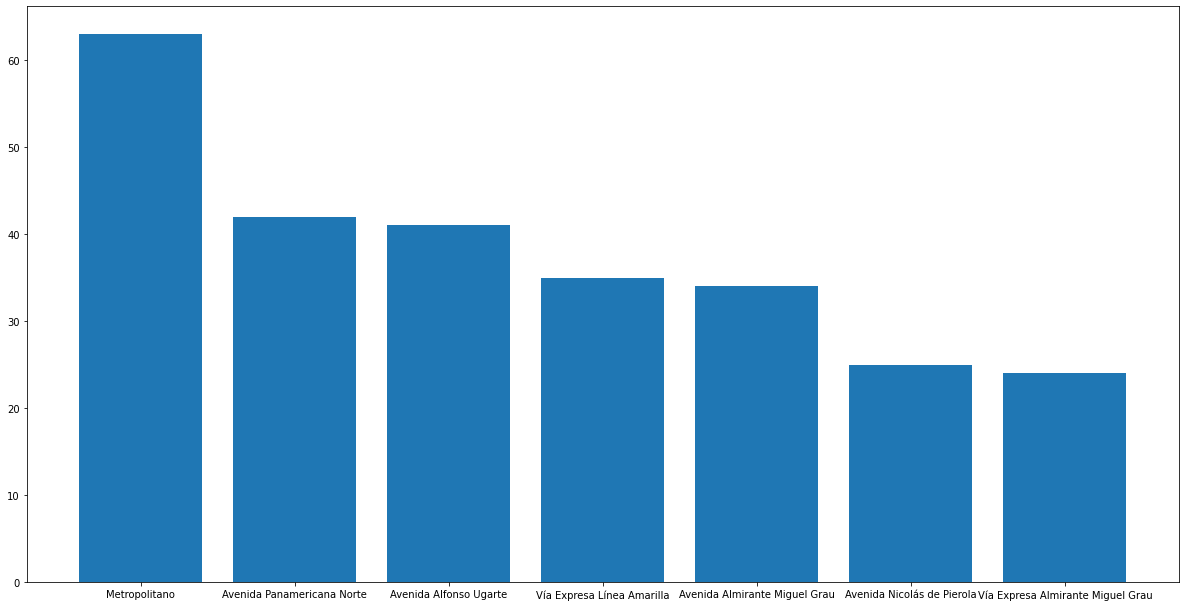

In [182]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,8))
ax = fig.add_axes([0,0,1,1])
langs = list(sortedavs.keys())[0:7]
students = list(sortedavs.values())[0:7]
ax.bar(langs,students,width=0.8)
plt.show()

Aquí se muestran los nombres de calles que más se repiten en los datos obtenidos. LLama la atención la presencia de el "Metropolitano" como uno de los más repetidos. Esto probablemente se deba a que esta zona que se ha seleccionado de Lima está altamente urbanizada y por lo tanto haya una alta demanda de transporte público. 

In [183]:
import math
import json
''' Haversine implementation adapted from: 
https://stackoverflow.com/questions/27928/calculate-distance-between-two-latitude-longitude-points-haversine-formula'''

def getDistanceFromLatLonInKm(lat1,lon1,lat2,lon2):
  R = 6371 # Radius of the earth in km
  dLat = deg2rad(lat2-lat1)  #  deg2rad below
  dLon = deg2rad(lon2-lon1) 
  a = math.sin(dLat/2) * math.sin(dLat/2) + math.cos(deg2rad(lat1)) * math.cos(deg2rad(lat2)) * math.sin(dLon/2) * math.sin(dLon/2)
  c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
  d = R * c #  Distance in km
  return d

def deg2rad(deg):
  return deg * (math.pi/180)

In [184]:
metNodes=[]
for way in ways:
  if 'name' in way['tags'].keys():
    if way['tags']['name']=='Metropolitano':
      metNodes.append(way['nodes'])


In [185]:
import numpy as np
distances=[]
for nodos in metNodes:
  for i in range(len(nodos)):
    if i < len(nodos)-1:
      try:
        idx1= ids.index(nodos[i])
        idx2= ids.index(nodos[i+1])
      except ValueError:
        continue
      dis=getDistanceFromLatLonInKm(coords[idx1][0],coords[idx1][1],coords[idx2][0],coords[idx2][1])
      distances.append(dis)

In [186]:
print("Distancia promedio entre nodos de Metropolitano",sum(distances)*1000/len(distances), " metros")

Distancia promedio entre nodos de Metrpolitano 17.44842661783017  metros


In [190]:
panNodes=[]
for way in ways:
  if 'name' in way['tags'].keys():
    if way['tags']['name']=='Avenida Panamericana Norte':
      panNodes.append(way['nodes'])

In [193]:
import numpy as np
distances=[]
for nodos in panNodes:
  for i in range(len(nodos)):
    if i < len(nodos)-1:
      try:
        idx1= ids.index(nodos[i])
        idx2= ids.index(nodos[i+1])
      except ValueError:
        continue
      dis=getDistanceFromLatLonInKm(coords[idx1][0],coords[idx1][1],coords[idx2][0],coords[idx2][1])
      distances.append(dis)

In [195]:
print("Distancia promedio entre nodos de Avenida Panamericana Norte",sum(distances)*1000/len(distances), " metros")

Distancia promedio entre nodos de Avenida Panamericana Norte 53.85515675542071  metros


In [196]:
afNodes=[]
for way in ways:
  if 'name' in way['tags'].keys():
    if way['tags']['name']=='Avenida Alfonso Ugarte':
      afNodes.append(way['nodes'])

In [197]:
import numpy as np
distances=[]
for nodos in afNodes:
  for i in range(len(nodos)):
    if i < len(nodos)-1:
      try:
        idx1= ids.index(nodos[i])
        idx2= ids.index(nodos[i+1])
      except ValueError:
        continue
      dis=getDistanceFromLatLonInKm(coords[idx1][0],coords[idx1][1],coords[idx2][0],coords[idx2][1])
      distances.append(dis)

In [199]:
print("Distancia promedio entre nodos de Avenida Alfonso Ugarte",sum(distances)*1000/len(distances), " metros")

Distancia promedio entre nodos de Avenida Alfonso Ugarte 11.264035500458078  metros


Tal como se ùede observar,luego de analizar las dinstancias entre los nodos de las 3 vías que más aparecen en la data, las vías del metropolitano tienen una gran densidad de nodos. Puesto que la distancia promedio entre nodo y nodo en estas vías es de 17,4 metros. Sin embargo, de estas tres, parece ser que la que tiene mayor densidad de nodos es la Avenida Alfonso Ugarte. Dado que, la distancia entre nodo y nodo de esta vía es de 11.2 metros. Esto puede ser a causa de que la avenida Alfonso Ugarte es una avenida que conecta a Cercado de Lima con Rímac. Además de que atraviesa la plaza Dos de Mayo y la plaza Ramon Castilla. Por lo que pudo haber atraído a más personas a reportar más nodos en esta avenida.

In [202]:
largo=getDistanceFromLatLonInKm(-12.0350,-77.0566,-12.0350,-77.0026)
alto=getDistanceFromLatLonInKm(-12.0350,-77.0566,-12.0605,-77.0566)
print()
print(f"El largo del área obtenida es: {largo} km")
print(f"El alto del área obtenida es:{alto} km")
print("----------------------------------------------------------------------------------------")
print(f"Él área del mapa con la que se va a trabajar es de {alto*largo} Km^2")
print()


El largo del área obtenida es: 5.872549022186773 km
El alto del área obtenida es:2.835470629436158 km
----------------------------------------------------------------------------------------
Él área del mapa con la que se va a trabajar es de 16.65144027233462 Km^2



# Referencias

Colaboradores de OpenStreetMap. (2021). Map features. 

https://wiki.openstreetmap.org/wiki/Map_features